Automobile Insurance Fraud Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
auto=pd.read_csv('insurance_fraud.csv')

In [3]:
# Let's see the automobile insurance dataset
auto.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [5]:
# Let's see the shape of the datasest
auto.shape

(1000, 40)

In [6]:
# Lets see the null values
auto.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# Let's see the nan values 
auto.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#list the columns names
auto.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
#auto = auto[auto.police_report_available != '?']

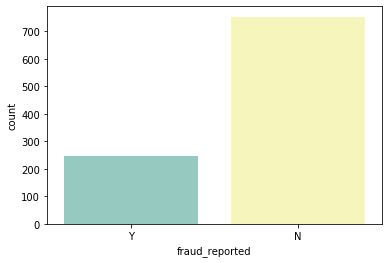

In [10]:
# Let's see the count distribution of fraud_reported
sns.countplot(auto.fraud_reported,data=auto,palette="Set3" )
plt.show()

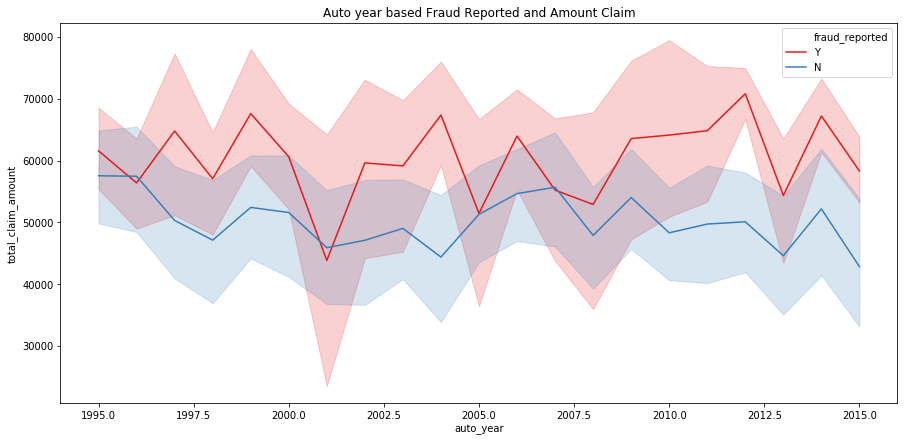

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))  
sns.lineplot(x='auto_year', y='total_claim_amount', hue='fraud_reported', data=auto, ax=ax,palette="Set1" )  
ax.set_title('Auto year based Fraud Reported and Amount Claim')  
plt.show()

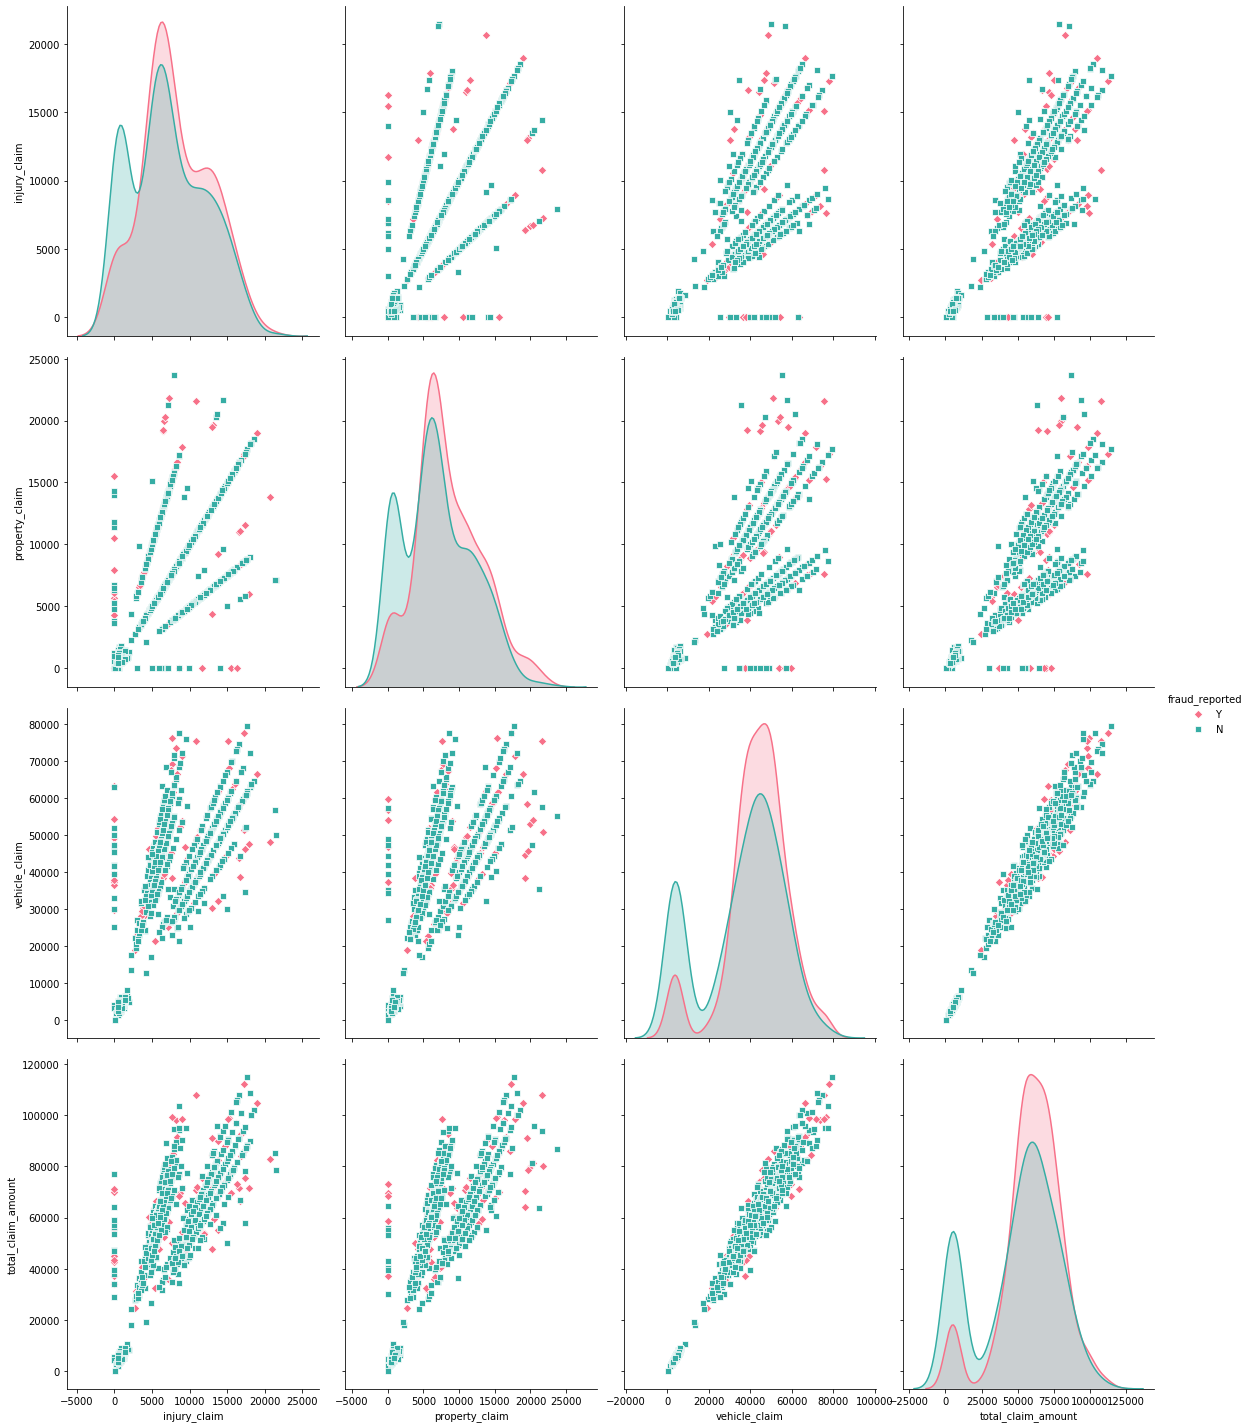

In [12]:
sns.pairplot(auto, vars = ["injury_claim", "property_claim", "vehicle_claim", "total_claim_amount"], 
             hue="fraud_reported",  palette="husl", diag_kind = 'kde', markers=["D", "s"],  height=5, aspect=0.8)

In [13]:
# Lets drop few columns before we split data for training the model
auto_df=auto.drop(['policy_number', 'policy_state', 'auto_make', 'auto_model', '_c39', 'insured_zip', 
                   'insured_education_level', 'insured_hobbies',  'incident_state',
                   'incident_city','policy_bind_date', 'incident_date' ,
                   'policy_csl', 'insured_sex', 'insured_relationship', 
                   'authorities_contacted', 'incident_location', 'insured_occupation'], axis=1)

In [14]:
auto_df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_type,collision_type,incident_severity,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1000,1406.91,0,53300,0,Single Vehicle Collision,Side Collision,Major Damage,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2000,1197.22,5000000,0,0,Vehicle Theft,?,Minor Damage,...,?,0,0,?,5070,780,780,3510,2007,Y
2,134,29,2000,1413.14,5000000,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,2000,1415.74,6000000,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,...,?,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,1000,1583.91,6000000,66000,-46000,Vehicle Theft,?,Minor Damage,...,NO,0,1,NO,6500,1300,650,4550,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,Single Vehicle Collision,Front Collision,Minor Damage,...,YES,0,1,?,87200,17440,8720,61040,2006,N
996,285,41,1000,1436.79,0,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,...,YES,2,3,?,108480,18080,18080,72320,2015,N
997,130,34,500,1383.49,3000000,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,...,?,2,3,YES,67500,7500,7500,52500,1996,N
998,458,62,2000,1356.92,5000000,0,0,Single Vehicle Collision,Rear Collision,Major Damage,...,?,0,1,YES,46980,5220,5220,36540,1998,N


In [15]:
#Let's prepare the independent variables 
x= auto_df.drop(['fraud_reported', 'auto_year'], axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x['incident_type'] = labelencoder.fit_transform(x['incident_type'])
x['collision_type'] = labelencoder.fit_transform(x['collision_type'])
x['property_damage'] = labelencoder.fit_transform(x['property_damage'])
x['police_report_available'] = labelencoder.fit_transform(x['police_report_available'])
x['incident_severity'] = labelencoder.fit_transform(x['incident_severity'])

auto_df['fraud_reported'] = labelencoder.fit_transform(auto_df['fraud_reported'])

In [18]:
# Let's prepare the target set
y=auto_df['fraud_reported']

In [19]:
# Lets use the standard Scaler to standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature = sc.fit_transform(x)
print(feature)

[[ 1.07813958  0.99083647 -0.22238259 ... -0.18928317  1.16550497
   0.74965272]
 [ 0.2089946   0.33407345  1.41278352 ... -1.36382194 -1.37269599
  -1.82334593]
 [-0.60800168 -1.08891308  1.41278352 ...  0.05464372 -0.73607206
  -0.78556451]
 ...
 [-0.64276748 -0.54161057 -1.03996564 ...  0.01364761  0.0208261
   0.77190224]
 [ 2.20802805  2.52328351  1.41278352 ... -0.45370813 -0.45197603
  -0.07357971]
 [ 2.19064515  2.3043625  -0.22238259 ... -1.42941572 -1.34366428
  -1.81434017]]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, y, test_size=0.25)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

models = []
models.append(("SVM",svm.SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))
models.append(("RF", RandomForestClassifier()))

In [25]:

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=52, shuffle = True)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())
print('\n')    
print('Standard Deviation ofor all Models ')
print('\n')
for i in range(len(names)):
    print(names[i],results[i].std())   

SVM 0.7586666666666667
KNN 0.7493333333333333
GNB 0.72
DT 0.6986666666666668
XGB 0.772
LGBM 0.764
ADA 0.7693333333333334
RF 0.768


Standard Deviation ofor all Models 


SVM 0.044000000000000004
KNN 0.04533333333333333
GNB 0.04173993557999607
DT 0.056316565551847664
XGB 0.04860726968948849
LGBM 0.05813394495091105
ADA 0.053682192371193045
RF 0.038735570790223876


***************************** SVM ***********************************************
Accuracy Score: 
 0.744
Confusion matrix of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) :
 [[180  10]
 [ 54   6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       190
           1       0.38      0.10      0.16        60

    accuracy                           0.74       250
   macro avg       0.57      0.52      0.50       250
weighted avg       0.67      0.74      0.68       250

ROC Score:  0.5236842105263159


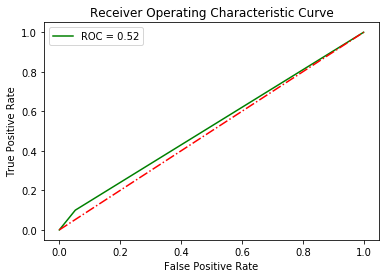

***************************** KNN ***********************************************
Accuracy Score: 
 0.74
Confusion matrix of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') :
 [[173  17]
 [ 48  12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       190
           1       0.41      0.20      0.27        60

    accuracy                           0.74       250
   macro avg       0.60      0.56      0.56       250
weighted avg       0.69      0.74      0.70       250

ROC Score:  0.5552631578947368


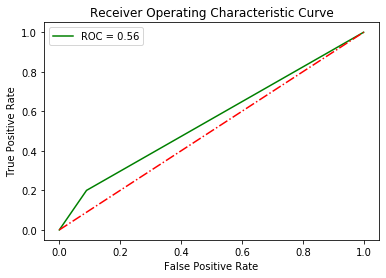

***************************** GNB ***********************************************
Accuracy Score: 
 0.708
Confusion matrix of GaussianNB(priors=None, var_smoothing=1e-09) :
 [[142  48]
 [ 25  35]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       190
           1       0.42      0.58      0.49        60

    accuracy                           0.71       250
   macro avg       0.64      0.67      0.64       250
weighted avg       0.75      0.71      0.72       250

ROC Score:  0.6653508771929825


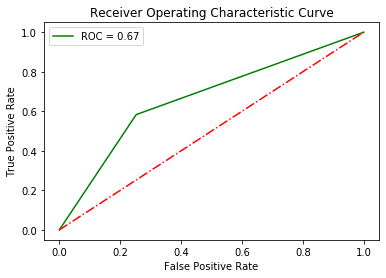

***************************** DT ***********************************************
Accuracy Score: 
 0.736
Confusion matrix of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') :
 [[155  35]
 [ 31  29]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       190
           1       0.45      0.48      0.47        60

    accuracy                           0.74       250
   macro avg       0.64      0.65      0.65       250
weighted avg       0.74      0.74      0.74       250

ROC Score:  0.6495614035087719


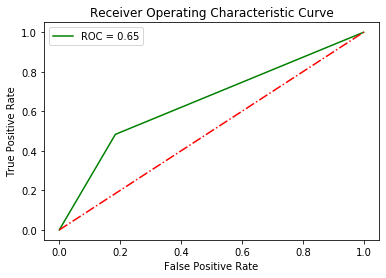

***************************** XGB ***********************************************
Accuracy Score: 
 0.796
Confusion matrix of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) :
 [[172  18]
 [ 33  27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       190
           1       0.60      0.45      0.51        60

    accuracy                           0.80       250
   macro avg       0.72      0.68      0.69       250
weighted avg       0.78      0.80      0.79       250

ROC Score:  0.677631578947

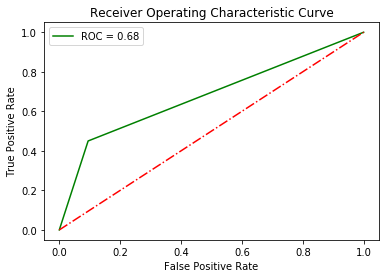

***************************** LGBM ***********************************************
Accuracy Score: 
 0.784
Confusion matrix of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) :
 [[173  17]
 [ 37  23]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       190
           1       0.57      0.38      0.46        60

    accuracy                           0.78       250
   macro avg       0.70      0.65      0.66       250
weighted avg       0.76      0.78      0.77       250

ROC Score:  0.6469298245614035


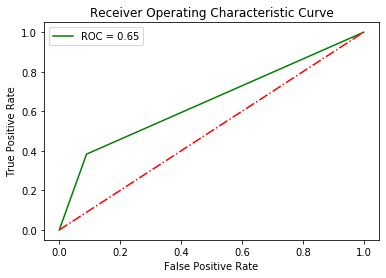

***************************** ADA ***********************************************
Accuracy Score: 
 0.82
Confusion matrix of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) :
 [[176  14]
 [ 31  29]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       190
           1       0.67      0.48      0.56        60

    accuracy                           0.82       250
   macro avg       0.76      0.70      0.72       250
weighted avg       0.81      0.82      0.81       250

ROC Score:  0.7048245614035088


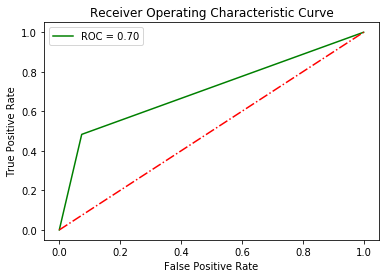

***************************** RF ***********************************************
Accuracy Score: 
 0.772
Confusion matrix of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) :
 [[171  19]
 [ 38  22]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       190
           1       0.54      0.37      0.44        60

    accuracy                           0.77       250
   macro avg       0.68      0.63      0.65       250
weigh

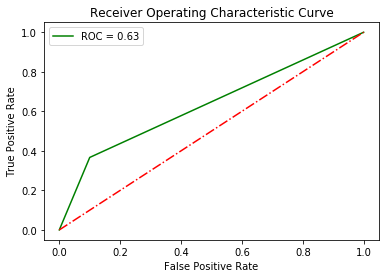

In [26]:
name = []
for name,model in models:
    print('*****************************', name, '***********************************************')
    model.fit(x_train, y_train)
    clf_prediction = model.predict(x_test)
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Accuracy Score: \n {}".format(accuracy_score(y_test, clf_prediction)))
    print("Confusion matrix of",model,":\n", _conf_matrix)
    print("==========================================")
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))
    
    #Area under the ROC curve for 
    _ROC_Curve=metrics.roc_auc_score(y_test,clf_prediction)
    print("ROC Score: ", _ROC_Curve)
  
    # Define Function to plot the ROC curve 
    def plot_roc_curve(roc_auc):
        
        plt.plot(fp_rate, tp_rate, color='green', label='ROC = %0.2f' % _ROC_Curve)
        plt.plot([0, 1], [0, 1], color='red', linestyle='-.')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend()
        plt.show()
    
    # Plot AUC_ROC curve 
    fp_rate, tp_rate, thresholds= roc_curve(y_test, clf_prediction)
    roc_auc=auc(fp_rate, tp_rate)
    plot_roc_curve(roc_auc)

In [27]:
# Lets Find Best Parameters for Random Forest using 
# Specify parameters and distributions for Random Forest
from sklearn.model_selection import RandomizedSearchCV
import time
rf_classification = RandomForestClassifier()
param_dist = dict(n_estimators=list(range(1,100)),
                  max_depth=list(range(1,100)),
                  min_samples_leaf=list(range(1,10)), random_state=list(range(42,242)), bootstrap=[True, False],
                  criterion = ["gini", "entropy"])
start_time = time.time()
rand_rf = RandomizedSearchCV(rf_classification, param_dist, cv=10)
rand_rf.fit(x_train, y_train)
training_time = time.time() - start_time
best_rf_classification = rand_rf.best_params_


print("Taining Time: ",training_time)
print("Best Parameters for Random Forest: ",best_rf_classification)

Taining Time:  5.630168914794922
Best Parameters for Random Forest:  {'random_state': 207, 'n_estimators': 92, 'min_samples_leaf': 1, 'max_depth': 31, 'criterion': 'gini', 'bootstrap': True}


*Test Accuracy: 77.6%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       190
           1       0.55      0.40      0.46        60

    accuracy                           0.78       250
   macro avg       0.69      0.65      0.66       250
weighted avg       0.76      0.78      0.76       250



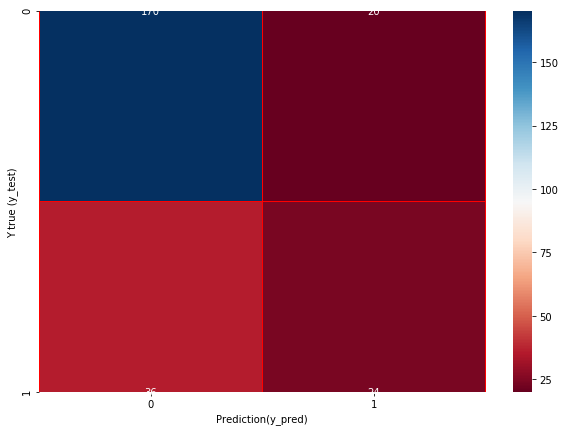

In [28]:
rf_ = RandomForestClassifier(random_state=207, n_jobs=-1,
                            n_estimators=92, min_samples_leaf = 1, 
                            max_depth=31, criterion='gini', bootstrap=True )
rf = rf_.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))
print("Classification Report: \n {}".format (classification_report(y_test, y_pred_rf)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax, cmap='RdBu')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

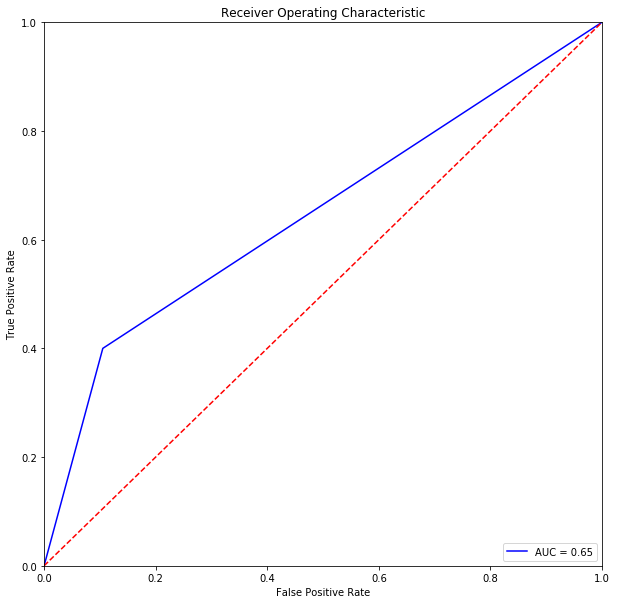

In [29]:
# ROC Curve
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_rf )
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
# Lets tune XGBClassifier and specify parameters and distributions
# A parameter grid for XGBoost
xgb_ = XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
start_time = time.time()
rand_xgb= RandomizedSearchCV(xgb_, params, cv=10)
rand_xgb.fit(x_train, y_train)
training_time = time.time() - start_time
best_xgb_classification = rand_xgb.best_params_


print("Taining Time: ",training_time)
print("Best Parameters for XGB: ",best_xgb_classification)

Taining Time:  12.274430274963379
Best Parameters for XGB:  {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.8}


*Test Accuracy: 77.6%
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       190
           1       0.61      0.45      0.52        60

    accuracy                           0.80       250
   macro avg       0.73      0.68      0.70       250
weighted avg       0.79      0.80      0.79       250



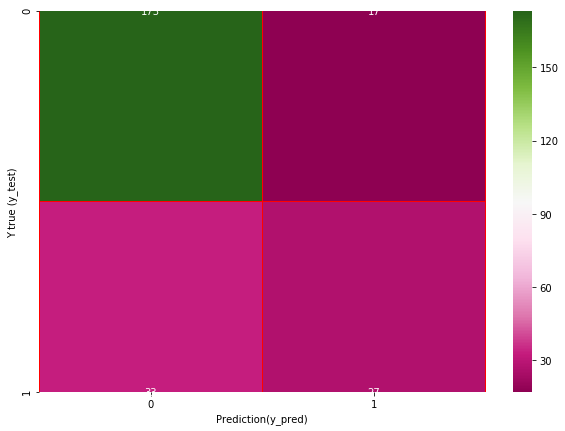

In [31]:
xgb_ = XGBClassifier(subsample= 1, min_child_weight=10, max_depth= 3, gamma= 1, colsample_bytree=1.0)
xgb = xgb_.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("*Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))
print("Classification Report: \n {}".format (classification_report(y_test, y_pred_xgb)))

# visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax, cmap='PiYG')
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Y true (y_test)")
plt.show()

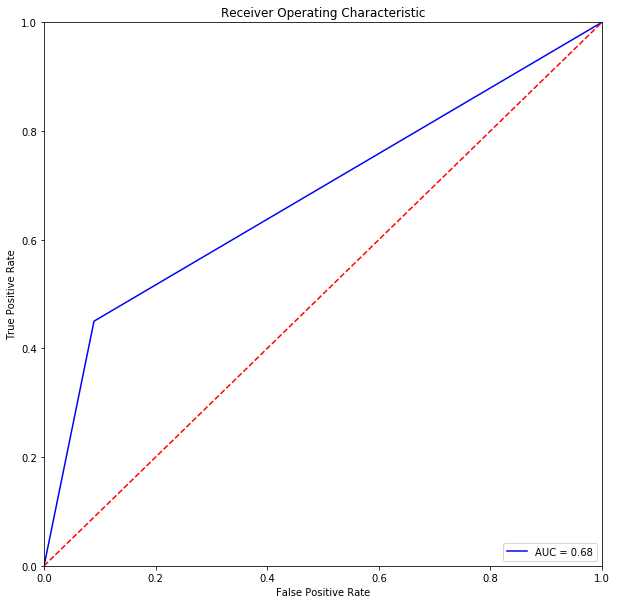

In [32]:
#Area under the ROC curve 
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_xgb )
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()